# Sampling Case Study - Monthly Salary Distribution of Taiwanese Employees

## Learning Objectives:
1. Explain basic random sampling concepts
2. Perform Python simulation to perform repeated random sampling
3. Describe large-sample behavior of sampling distributions 

<i><b>Background</b></i>: The data source is from Taiwan’s Taxation Bureau, which consists of 5 local branches all over Taiwan. In the tables below, we can have a basic understanding of the monthly salary distribution of full-time Taiwanese employees in 2005. Although the total population in Taiwan is estimated at over 23 million people in 2005, only 5.11 million people’s salary information can be accurately ascertained after considering multiple demographic criteria and checking the accuracy of income records. All of the following statistics in the tables are calculated by the Ministry of Finance, Taiwan, using the income data from the Taxation Bureau.

<img src="Age.jpg" alt="Age Distribution">

From the above tables, you can assume the population data of salaries of full-time Taiwanese employees are available for us to carry out more detailed analytics. 

## Task 1-1

Although the average monthly salary can be an indicator of central tendency to represent the typical earnings of a Taiwanese, it may not be a good indicator sometimes, due to the impact of extreme income levels in the population. Thus, we also want to know a Taiwanese’s median monthly salary to get a full picture of the salary distribution. However, this piece of information is lacking. Please find out the possible estimate of the median monthly salary by using Python simulation utilizing sampling concepts. That is, please use simulation to generate a random sample of size 200 using the population information provided in the above tables. Moreover, we make an explicit distributional assumption on the age-specific salary subpopulations. For example, we assume that for those Taiwanese under 20 years of age, their monthly salary population will be a normal distribution with mean 17,487 and variance $7,459^2$. Similarly, the salary population of Taiwanese with age between 21 and 30 follows another normal distribution with mean 32,481 and variance $18,207^2$. All other age-specific salary subpopulations can be defined accordingly. Please use Python to obtain a random sample of size 200 and estimate the sample median monthly salary. 

<i><b>Note 1</b></i>: In your sample, the age-group composition of the sample must be the same (or very close to) the age-group composition of the population. For example, the 21-30 age group constitutes 22.86% (1,170,176/5,118,136) of the population. Hence, in your sample, 46 persons should come from the 21-30 age group.

<i><b>Note 2</b></i>: When you simulate a random value from the specified normal distribution, it is possible that the simulated value is negative. However, the monthly salary must be non-negative. Thus, please take note that your Python code should be able to make sure the simulated value is positive. This restriction can be guaranteed by imposing a conditional check (say, if statement) into the code. 

**Solution**

In [1]:
import numpy as np
from scipy import stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

In [2]:
#first
#sps.norm.rvs(loc=17487,scale=7459,size=4)

# 51-60
#sps.norm.rvs(loc=59514,scale=103232,size=27)

#func => to ignore negative values


#x= pos_norm(10,1,10)
#print(x)

In [3]:
# Define a Python function to handle negative simulated values of a normal distribution
def pos_norm(mean,std,size):
    out = np.zeros(size,dtype=float)
    
    for i in range(size):
        s = 0.0 # inital values
        while True :
            s= sps.norm.rvs(loc=mean,scale=std,size=1)
            if(s>0.0):
                break
        out[i] = s
    return out
         


In [4]:
# Define the population summary from the tables given
pop_mean = [17487, 32481, 47044, 56863, 59514, 76572, 114779] # mean salary numbers
pop_std = [7459, 18207, 37225, 65919, 103232, 137916, 360839] # std of salary numbers
pop_prop = [0.020665727, 0.228633237, 0.351184494, 0.245451664, 0.135381905, 0.017244559, 0.001438414]

np.sum(pop_prop)

1.0

In [5]:
#define size elements
size200 = np.array([4,46,70,49,27,3,1],dtype=int)



In [6]:
#sample share age-group wise

combined = pos_norm(pop_mean[0], pop_std[0], size200[0])

for i in range(1,7):
    sample = pos_norm(pop_mean[i], pop_std[i], size200[i]) # generate sample for each of the age group
    combined = np.concatenate((combined, sample)) # append the sample to the combined array
#combined

## Task 1-2

Please perform repeated random sampling of size 200 from the Taiwanese population and estimate the sampling distribution of sample median monthly salary. (The sampling distribution must be constructed with 5000 repeated sampling outcomes and you need to visualize the sampling distribution simulated as your answers). 

**Solution**

In [7]:
# Simulate the sampling distribution of the median salary with 5000 repeated sampling outcomes
repeat = 5000
repeat_median = np.zeros(repeat,dtype=float)
count = 1

for i in range(1,5000) :
    combined = pos_norm(pop_mean[0], pop_std[0], size200[0])
    
    for i in range(1,7):
        sample = pos_norm(pop_mean[i], pop_std[i], size200[i]) # generate sample for each of the age group
        combined = np.concatenate((combined, sample)) # append the sample to the combined array

    #print(np.median(combined))
    repeat_median[count-1] = np.median(combined)
    
    if count == repeat:
        break
    count +=1
 

(30000.0, 70000.0)

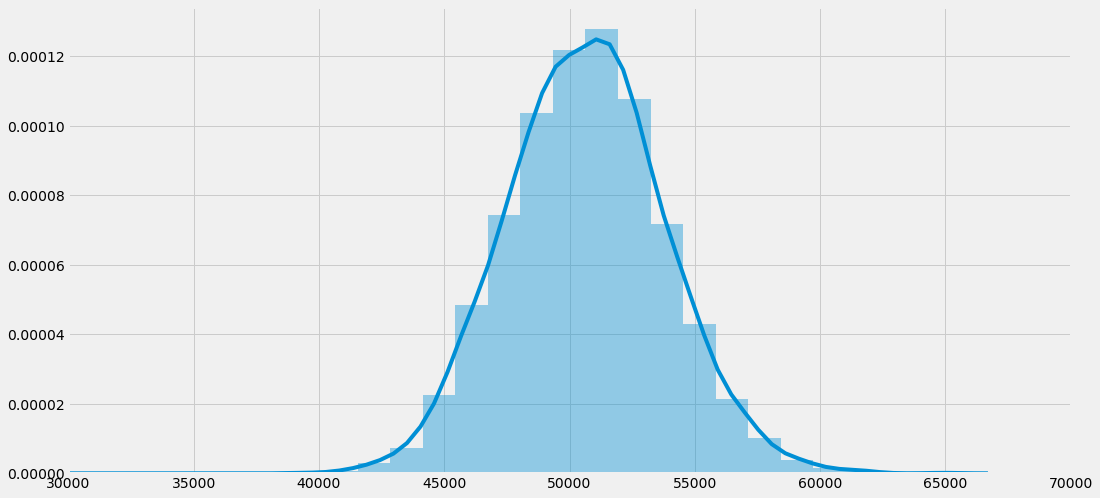

In [8]:
# Visualize the sampling distribution

fig=plt.figure(figsize=(16, 8))
sns.distplot(repeat_median)
plt.xlim(30000,70000)


## Task 1-3	

Please repeat your repeated sampling in Task 1-2, but now you need to increase the sample size from 200 to 500 and 1000. Comment on the shape of the sampling distribution of the median monthly salary. When the sample size increases, is the sampling distribution of the median monthly salary approaching a normal distribution? (Please draw a panel of histograms to present your visualization).

**Solution**

In [9]:
# % will change 200 to 500 to 1000

print(np.multiply(pop_prop,500))

size500 = np.zeros(size200.size,dtype=int)
size1000 =  np.zeros(size200.size,dtype=int)
count = 0;
for i in  pop_prop:
    size500[count]  = i*500
    size1000[count] = i*1000
    count = count+1

size1000

[ 10.3328635 114.3166185 175.592247  122.725832   67.6909525   8.6222795
   0.719207 ]


array([ 20, 228, 351, 245, 135,  17,   1])

In [10]:
# Simulate the sampling distribution of the median salary with 5000 repeated sampling outcomes
repeat = 5000
repeat_median = np.zeros(repeat,dtype=float)
count = 1

for i in range(1,5000) :
    combined = pos_norm(pop_mean[0], pop_std[0], size500[0])
    
    for i in range(1,7):
        sample = pos_norm(pop_mean[i], pop_std[i], size500[i]) # generate sample for each of the age group
        combined = np.concatenate((combined, sample)) # append the sample to the combined array

    #print(np.median(combined))
    repeat_median[count-1] = np.median(combined)
    
    if count == repeat:
        break
    count +=1
    


(30000.0, 70000.0)

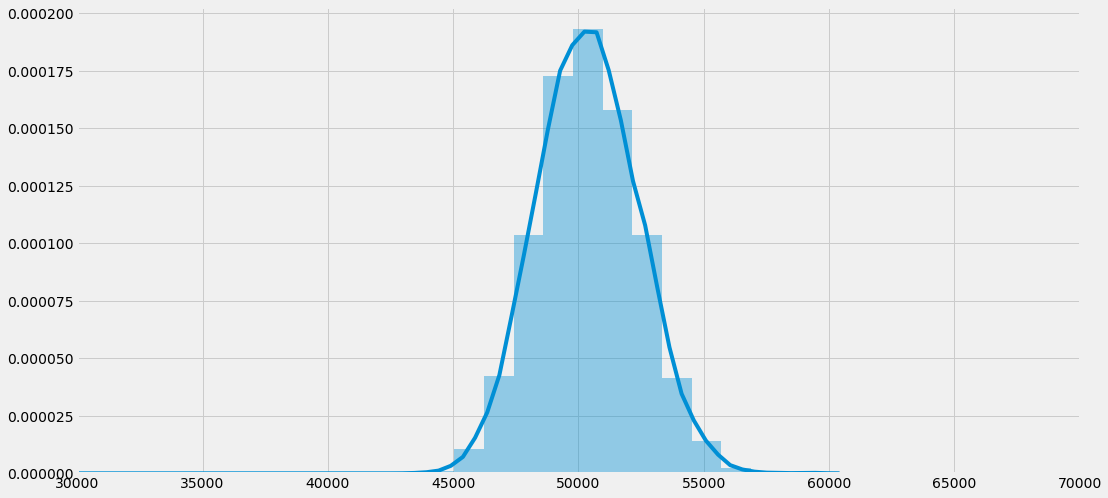

In [11]:
# Visualize the sampling distribution
fig=plt.figure(figsize=(16, 8))
sns.distplot(repeat_median)
plt.xlim(30000,70000)

In [12]:
# Simulate the sampling distribution of the median salary with 5000 repeated sampling outcomes
repeat = 5000
repeat_median = np.zeros(repeat,dtype=float)
count = 1

for i in range(1,5000) :
    combined = pos_norm(pop_mean[0], pop_std[0], size1000[0])
    
    for i in range(1,7):
        sample = pos_norm(pop_mean[i], pop_std[i], size1000[i]) # generate sample for each of the age group
        combined = np.concatenate((combined, sample)) # append the sample to the combined array

    #print(np.median(combined))
    repeat_median[count-1] = np.median(combined)
    
    if count == repeat:
        break
    count +=1
    

(30000.0, 70000.0)

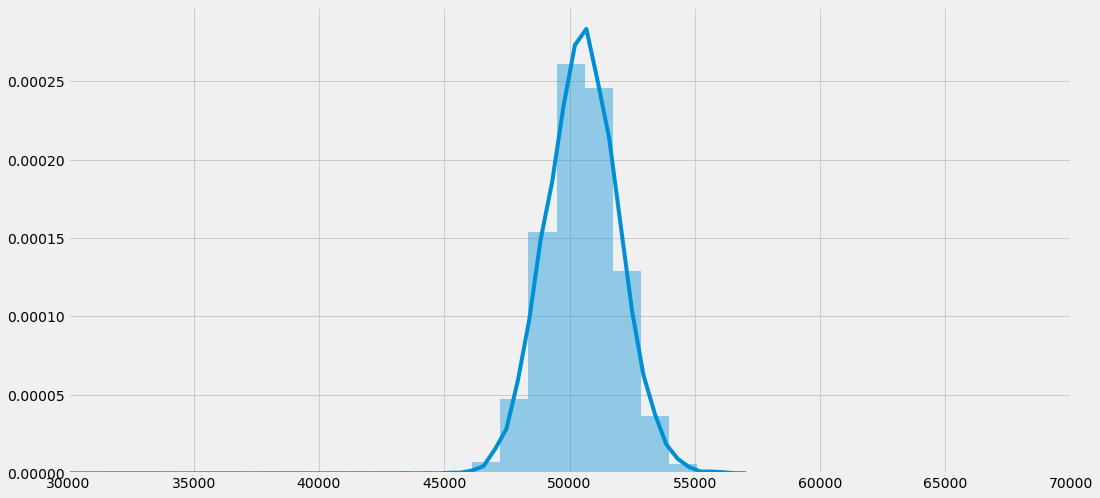

In [13]:
# Visualize the sampling distribution
fig=plt.figure(figsize=(16, 8))
sns.distplot(repeat_median)
plt.xlim(30000,70000)